# Exploratory Data Analysis (EDA)

El objetivo de este notebook es realizar un análisis exploratorio de datos sobre los juegos de Steam, una plataforma de distribución digital de videojuegos. Los datos que se van a analizar provienen de tres fuentes diferentes:

- Un dataset `steam_games` que contiene información sobre los juegos disponibles en Steam, como el nombre, el precio, el año de lanzamiento, el género y el acceso anticipado.
- Un dataset `user_items` que contiene información sobre los juegos de los usuarios, como el identificador del juego, el tiempo de juego acumulado y el identificador del usuario.
- Un dataset `user_reviews` que contiene información sobre las reseñas de los usuarios, como el identificador del juego, la recomendación, el identificador del usuario, el año de publicación y el análisis de sentimiento.

El análisis exploratorio de datos se realizará utilizando las librerías de Python pandas, seaborn y matplotlib, que permiten manipular, visualizar y explorar los datos de forma eficiente. El análisis se dividirá en las siguientes secciones:

- Análisis de los juegos: se explorarán las características de los juegos disponibles en Steam, como el precio, el año de lanzamiento, el género y el acceso anticipado. Se mostrarán gráficos de distribución, de conteo y de caja para visualizar los datos.
- Análisis del tiempo de juego: se explorarán las características del tiempo de juego de los usuarios, como el tiempo de juego acumulado, el tiempo de juego por juego y el tiempo de juego por usuario. Se mostrarán gráficos de distribución, de dispersión y de correlación para visualizar los datos.
- Análisis de las reseñas: se explorarán las características de las reseñas de los usuarios, como la recomendación, el año de publicación y el análisis de sentimiento. Se mostrarán gráficos de conteo, de barras y de torta para visualizar los datos.

El análisis exploratorio de datos nos permitirá obtener una mejor comprensión de los datos, identificar posibles patrones, anomalías y variables relevantes, y generar hipótesis e insights para futuros análisis o modelos.


## 0 Configuraciones Globales e Importaciones

En esta sección, importamos todas las bibliotecas y/o modulos necesarios para nuestro proceso de feature engineering y establecemos configuraciones globales de ser requerido.

In [127]:
import sys
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

custom_params = {"axes.spines.right": False, "axes.spines.top": False}
sns.set_theme(style="ticks", rc=custom_params)


print(f"System version: {sys.version}")
print(f"pandas version: {pd.__version__}")
print(f"matplotlib version: {matplotlib.__version__}")
print(f"seaborn version: {sns.__version__}")

System version: 3.11.5 (tags/v3.11.5:cce6ba9, Aug 24 2023, 14:38:34) [MSC v.1936 64 bit (AMD64)]
pandas version: 2.1.3
matplotlib version: 3.8.2
seaborn version: 0.13.0


### 1.1 Extracción de los datos

Creamos una función que lee cada archivo desde su directorio y lo carga a un DataFrame de `pandas`.

In [125]:
# Cargamos los archivos parquet
def read_parquet_files(parquet_files):
    dataframes = {}
    for name in parquet_files:
        dataframes[name] = pd.read_parquet(f'../data/interim/{name}.parquet', engine='pyarrow')
    return dataframes

parquet_files = ['steam_games','user_items', 'user_reviews']
dataframes = read_parquet_files(parquet_files)

# Convertimos a df.
df_steam_games = dataframes['steam_games']
df_user_items = dataframes['user_items']
df_user_reviews = dataframes['user_reviews']

## 1 Dataset `steam_games`

In [128]:
df_steam_games.head()

,publisher,item_name,price,early_access,item_id,developer,release_year,genres
0,Kotoshiro,Lost Summoner Kitty,4.99,False,761140,Kotoshiro,2018,Strategy
0,Kotoshiro,Lost Summoner Kitty,4.99,False,761140,Kotoshiro,2018,Action
0,Kotoshiro,Lost Summoner Kitty,4.99,False,761140,Kotoshiro,2018,Indie
0,Kotoshiro,Lost Summoner Kitty,4.99,False,761140,Kotoshiro,2018,Casual
0,Kotoshiro,Lost Summoner Kitty,4.99,False,761140,Kotoshiro,2018,Simulation


In [129]:
df_steam_games.info()

<class 'pandas.core.frame.DataFrame'>
Index: 82806 entries, 0 to 32132
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   publisher     82806 non-null  object 
 1   item_name     82806 non-null  object 
 2   price         82806 non-null  float64
 3   early_access  82806 non-null  bool   
 4   item_id       82806 non-null  object 
 5   developer     82806 non-null  object 
 6   release_year  82806 non-null  object 
 7   genres        82806 non-null  object 
dtypes: bool(1), float64(1), object(6)
memory usage: 5.1+ MB


### 1.1 `publisher`

In [123]:
publisher = df_steam_games.publisher.nunique()
print(f'Tenemos registros de {publisher} editoras de juegos.')

Tenemos registros de 8240 editoras de juegos.


In [130]:
counts = df_steam_games["publisher"].value_counts()
percentage = df_steam_games["publisher"].value_counts(normalize=True).mul(100).round(2).astype(str) + "%"

df_publisher = pd.DataFrame({"publisher": counts.index, "counts": counts.values, "percentage": percentage.values})
df_publisher.sort_values("counts", ascending=False)

,publisher,counts,percentage
0,unknown,19751,23.85%
1,KISS ltd,813,0.98%
2,Ubisoft,789,0.95%
3,Paradox Interactive,478,0.58%
4,SEGA,447,0.54%
...,...,...,...
7898,Get Color Games,1,0.0%
7897,Eric Lipschutz,1,0.0%
7896,RTK Entertainment,1,0.0%
7895,Richard Haraším,1,0.0%


* Hay 19751 juegos que no registran un editor. Esto que nos deja a KISS ltd y Ubisoft como las principales editoras. 

### 1.2 `item_name`

In [86]:
titles = df_steam_games.item_name.nunique()
print(f'Tenemos {titles} títulos disponibles.')

Tenemos 32095 títulos disponibles.


In [131]:
df_steam_games[df_steam_games["item_name"] == 'unknown']

,publisher,item_name,price,early_access,item_id,developer,release_year,genres
2579,unknown,unknown,4.99,False,317160,unknown,2014,Action
2579,unknown,unknown,4.99,False,317160,unknown,2014,Indie


* Solo tenemos 2 nombres para juegos faltantes que notamos por el item_id que es el mismo pero con un genero distinto para cada registro.

### 1.3 `price`

In [21]:
df_steam_games.describe()

,price
count,82806.000000
mean,8.744736
std,15.765811
min,0.000000
25%,2.990000
50%,4.990000
75%,9.990000
max,995.000000


In [121]:
counts = df_steam_games["price"].value_counts()
percentage = df_steam_games["price"].value_counts(normalize=True).mul(100).round(2).astype(str) + "%"

df_price = pd.DataFrame({"price": counts.index, "counts": counts.values, "percentage": percentage.values})
df_price.sort_values("counts", ascending=False)

,price,counts,percentage
0,4.99,13577,16.4%
1,9.99,10270,12.4%
2,2.99,8153,9.85%
3,0.00,7112,8.59%
4,0.99,6544,7.9%
...,...,...,...
136,99.00,1,0.0%
135,499.00,1,0.0%
133,124.99,1,0.0%
132,42.99,1,0.0%


* Notamos que la gran mayoria de los juegos tienen precio de 4.99. Ademas de que tenemos 7112 juegos gratuitos.

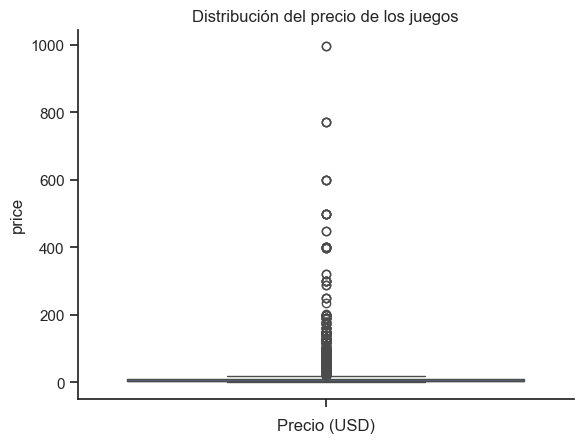

In [115]:
sns.boxplot(data=df_steam_games, y="price")
plt.xlabel("Precio (USD)")
plt.title("Distribución del precio de los juegos")
plt.show()


* Hay valores muy extremos entre los precios. Lo que hace que el rango sea amplio. El maximo se encuentra 995.

In [133]:
df_steam_games[df_steam_games["price"] > 200].sort_values('price', ascending=False).head(15)


,publisher,item_name,price,early_access,item_id,developer,release_year,genres
12087,"Strata Mixed Reality, Inc.",Strata Spaces VR – Professional Edition Upgrade,995.00,False,719000,"Strata Mixed Reality, Inc.",2017,Design &amp; Illustration
12087,"Strata Mixed Reality, Inc.",Strata Spaces VR – Professional Edition Upgrade,995.00,False,719000,"Strata Mixed Reality, Inc.",2017,Animation &amp; Modeling
2391,Aerosoft GmbH,X-Plane 10 Global - 64 Bit,771.71,False,292180,Laminar Research,2014,Simulation
2391,Aerosoft GmbH,X-Plane 10 Global - 64 Bit,771.71,False,292180,Laminar Research,2014,Free to Play
2391,Aerosoft GmbH,X-Plane 10 Global - 64 Bit,771.71,False,292180,Laminar Research,2014,Adventure
23593,unknown,HTC Vive,599.00,False,358040,unknown,2016,Free to Play
23593,unknown,HTC Vive,599.00,False,358040,unknown,2016,Simulation
23593,unknown,HTC Vive,599.00,False,358040,unknown,2016,Action
23593,unknown,HTC Vive,599.00,False,358040,unknown,2016,RPG
17793,CCP,EVE Online: 15400 PLEX,499.99,False,629796,CCP,2017,Massively Multiplayer


* Estos precios altos no parecen representar juegos sino consolas o perifericos de gaming mucho mas costosos que el promedio de los juegos de ahi que se aprecien como outliers. 

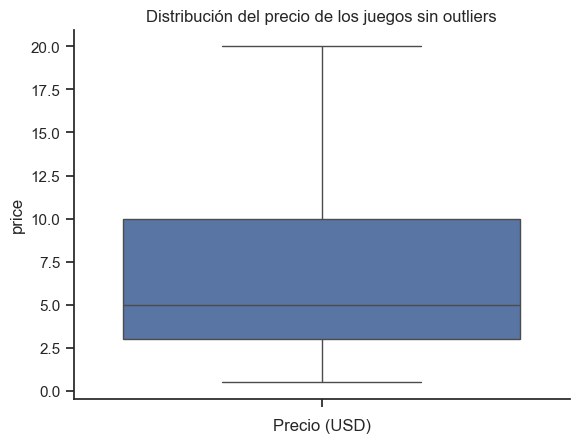

In [114]:
df_price_no_outliers = df_steam_games[(df_steam_games["price"] > 0) & (df_steam_games["price"] < 20)]

sns.boxplot(data=df_price_no_outliers, y="price")
plt.xlabel("Precio (USD)")
plt.title("Distribución del precio de los juegos sin outliers")
plt.show()


* Aca podemos apreciar mejor la disribucion de los precios sin outliers.

### 1.4 `early_access`

In [92]:
counts = df_steam_games["early_access"].value_counts()
percentage = df_steam_games["early_access"].value_counts(normalize=True).mul(100).round(2).astype(str) + "%"

df_early_access = pd.DataFrame({"early_access": counts.index, "counts": counts.values, "percentage": percentage.values})
df_early_access

,early_access,counts,percentage
0,False,74668,90.17%
1,True,8138,9.83%


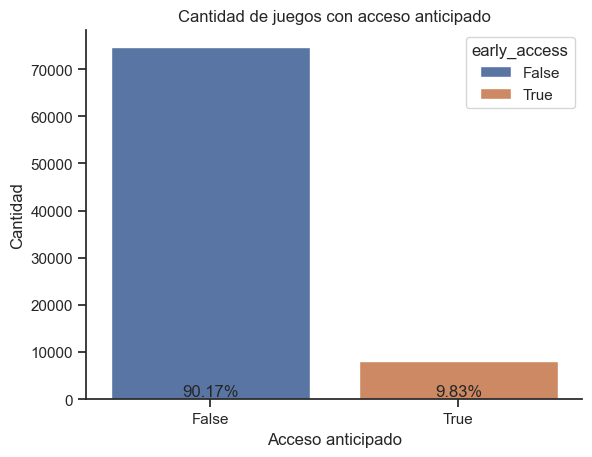

In [98]:
sns.countplot(data=df_steam_games, x="early_access", hue="early_access")
plt.xlabel("Acceso anticipado")
plt.ylabel("Cantidad")
plt.title("Cantidad de juegos con acceso anticipado")

percentage = df_steam_games["early_access"].value_counts(normalize=True).mul(100).round(2).astype(str) + "%"

for i, p in enumerate(percentage):
    plt.text(i, 0, p, ha="center", va="bottom")

plt.show()


* Notamos que son pocos los juegos con acceso temprano. Solo cerca del 10% ha tenido acceso temprano.

### 1.5 `item_id`

In [78]:
games = df_steam_games.item_id.nunique()
print(f'Tenemos registros de {games} juegos.')

Tenemos registros de 32132 juegos.


### 1.6 `developer`

In [75]:
developer = df_steam_games.developer.nunique()
print(f'Tenemos {developer} desarrrolladores.')

Tenemos 10993 desarrrolladores.


In [99]:
counts = df_steam_games["developer"].value_counts()
percentage = df_steam_games["developer"].value_counts(normalize=True).mul(100).round(2).astype(str) + "%"

df_developer = pd.DataFrame({"developer": counts.index, "counts": counts.values, "percentage": percentage.values})
df_developer.head(15)

,developer,counts,percentage
0,unknown,7462,9.01%
1,"SmiteWorks USA, LLC",2603,3.14%
2,Ubisoft - San Francisco,2518,3.04%
3,DL Softworks,496,0.6%
4,Ronimo Games,379,0.46%
5,Paradox Development Studio,322,0.39%
6,Musopia,302,0.36%
7,Dovetail Games,287,0.35%
8,Arcane Raise,263,0.32%
9,"KOEI TECMO GAMES CO., LTD.",251,0.3%


* Tenemos 7462 valores faltantes. Siendo SmiteWorks USA, LLC con 2603 juegos el desarrollador con mayor cantidad de juegos desarrollados, seguido de Ubisoft - San Francisco con 2518 juegos desarrollados.

### 1.7 `release_year`

In [62]:
year = df_steam_games.release_year.nunique()
unique_year =df_steam_games.release_year.unique()
print(sorted(unique_year))
print(f'Tenemos registros de {year} años distintos.')

['1970', '1975', '1980', '1981', '1982', '1983', '1984', '1985', '1986', '1987', '1988', '1989', '1990', '1991', '1992', '1993', '1994', '1995', '1996', '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004', '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017', '2018', '2019', '2021', 'unknown']
Tenemos registros de 44 años distintos.


In [100]:
counts = df_steam_games["release_year"].value_counts()
percentage = df_steam_games["release_year"].value_counts(normalize=True).mul(100).round(2).astype(str) + "%"

df_release_year = pd.DataFrame({"year": counts.index, "counts": counts.values, "percentage": percentage.values})
df_release_year.head(15)

,year,counts,percentage
0,2017,26236,31.68%
1,2016,18602,22.46%
2,2015,13125,15.85%
3,2014,7080,8.55%
4,unknown,6328,7.64%
5,2013,3358,4.06%
6,2012,2373,2.87%
7,2011,1213,1.46%
8,2010,833,1.01%
9,2009,629,0.76%


* Tenemos 6328 valores faltantes y el año con mas lanzamientos de juegos es el 2017.

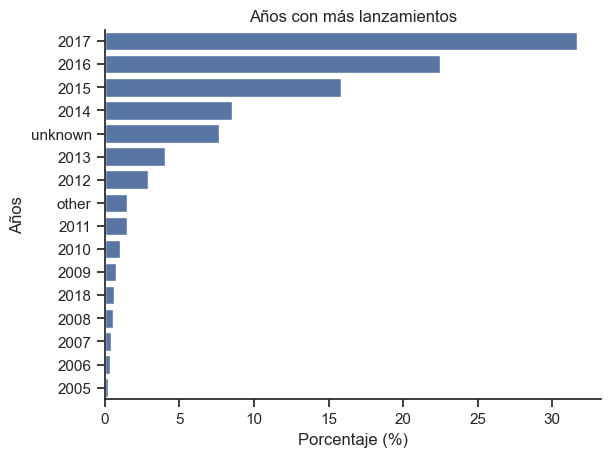

In [69]:
percentage = df_steam_games["release_year"].value_counts(normalize=True).mul(100).round(2)
top_15 = percentage.nlargest(15).index.tolist()
df_steam_games["grouped_years"] = df_steam_games["release_year"].apply(lambda x: x if x in top_15 else "other")
grouped_percentage = df_steam_games["grouped_years"].value_counts(normalize=True).mul(100).round(2)


sns.barplot(y=grouped_percentage.index, x=grouped_percentage.values)
plt.ylabel("Años")
plt.xlabel("Porcentaje (%)")
plt.title("Años con más lanzamientos")
plt.show()

### 1.8 `genres`

In [32]:
genre = df_steam_games.genres.nunique()
print(f'Tenemos {genre} géneros distintos')

Tenemos 23 géneros distintos


In [67]:
counts = df_steam_games["genres"].value_counts()
percentage = df_steam_games["genres"].value_counts(normalize=True).mul(100).round(2).astype(str) + "%"

df_steam_games_genres = pd.DataFrame({"genres": counts.index, "counts": counts.values, "percentage": percentage.values})
df_steam_games_genres.head(15)


,genres,counts,percentage
0,Indie,17633,21.29%
1,Action,13009,15.71%
2,Adventure,9835,11.88%
3,Casual,9758,11.78%
4,Simulation,7735,9.34%
5,Strategy,7571,9.14%
6,RPG,5920,7.15%
7,Free to Play,2406,2.91%
8,Early Access,1947,2.35%
9,Sports,1598,1.93%


* Hay 1030 valores faltantes, siendo Indie el género mas frecuente.

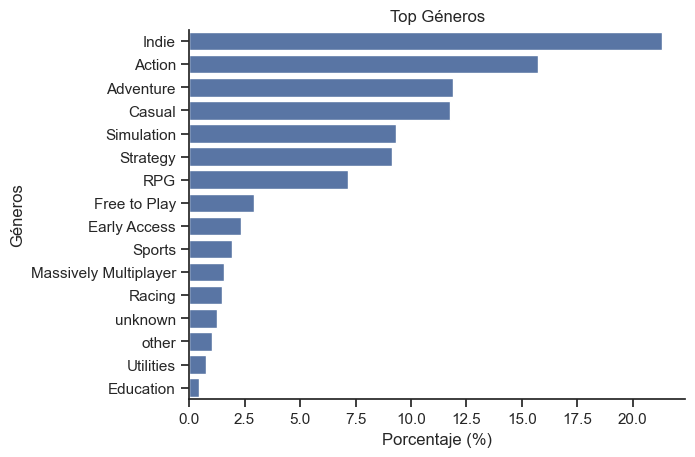

In [53]:
percentage = df_steam_games["genres"].value_counts(normalize=True).mul(100).round(2)
top_15 = percentage.nlargest(15).index.tolist()
df_steam_games["grouped_genres"] = df_steam_games["genres"].apply(lambda x: x if x in top_15 else "other")
grouped_percentage = df_steam_games["grouped_genres"].value_counts(normalize=True).mul(100).round(2)


sns.barplot(y=grouped_percentage.index, x=grouped_percentage.values)
plt.ylabel("Géneros")
plt.xlabel("Porcentaje (%)")
plt.title("Top Géneros")
plt.show()

In [13]:
df_steam_games.info()

<class 'pandas.core.frame.DataFrame'>
Index: 82806 entries, 0 to 32132
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   publisher     82806 non-null  object 
 1   item_name     82806 non-null  object 
 2   price         82806 non-null  float64
 3   early_access  82806 non-null  bool   
 4   item_id       82806 non-null  object 
 5   developer     82806 non-null  object 
 6   release_year  82806 non-null  object 
 7   genres        82806 non-null  object 
dtypes: bool(1), float64(1), object(6)
memory usage: 5.1+ MB


In [29]:
sns.barplot(data=df_steam_games, x="genre", y="percentage")
plt.xlabel("Géneros")
plt.ylabel("Porcentaje (%)")
plt.title("Géneros más populares de los juegos")
plt.show()


ValueError: Could not interpret value `genre` for `x`. An entry with this name does not appear in `data`.

## 3 Dataset `user_items`

In [14]:
df_user_items.head()

,item_id,playtime_forever,user_id
0,10,0.100000,76561197970982479
1,20,0.000000,76561197970982479
2,30,0.116667,76561197970982479
3,40,0.000000,76561197970982479
4,50,0.000000,76561197970982479


In [15]:
df_user_items.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5094092 entries, 0 to 5153208
Data columns (total 3 columns):
 #   Column            Dtype  
---  ------            -----  
 0   item_id           object 
 1   playtime_forever  float64
 2   user_id           object 
dtypes: float64(1), object(2)
memory usage: 155.5+ MB


In [ ]:
sns.barplot(data=df, x="release_year", y="sum_playtime_forever", hue="genres")
plt.xlabel("Año de lanzamiento")
plt.ylabel("Tiempo de juego acumulado (minutos)")
plt.title("Juegos más jugados por año y género")
plt.show()

## 4 Dataset `user_reviews`

In [16]:
df_user_reviews.head()

,item_id,recommend,user_id,posted_year,sentiment_analysis
0,1250,True,76561197970982479,2011,2
1,22200,True,76561197970982479,2011,2
2,43110,True,76561197970982479,2011,2
3,251610,True,js41637,2014,2
4,227300,True,js41637,2013,0


In [17]:
df_user_reviews.info()

<class 'pandas.core.frame.DataFrame'>
Index: 58431 entries, 0 to 59304
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   item_id             58431 non-null  object
 1   recommend           58431 non-null  bool  
 2   user_id             58431 non-null  object
 3   posted_year         58431 non-null  object
 4   sentiment_analysis  58431 non-null  int64 
dtypes: bool(1), int64(1), object(3)
memory usage: 2.3+ MB
